# Ensemble learning and random forests (1 Mar 2019)

1. Introduction

    * A group of predictors is called as ensemble. Eg) logistic regression + voting classifier + random forest classifier
    * Random forest is a group of decision tree classifiers
    * Types of ensemble methods:
        * voting classifier
        * bagging and pasting
        * boosting (Adaboost, Gradient boosting)
        * random forest
        

2. Advantages of Ensemble Learning



3. Disadvantages of Ensemble Learning
    

### a. Voting Classifiers

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# define respective models
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC()

In [2]:
# handling of dataset
noise_list = [round((value*0.1),3) for value in range(1,11)]
mainlist_accuracy = []
counter = 1
for value in noise_list:
    dataset = make_moons(n_samples=10000, 
                         shuffle=True, 
                         noise= value, 
                         random_state=None)
    x_train, x_test = train_test_split(dataset[0], test_size = 0.2)
    y_train, y_test = train_test_split(dataset[1], test_size = 0.2)
    voting_model = VotingClassifier(
                estimators = [('log',logistic_model),('rf',rf_model),('svc',svm_model)],
                voting = 'hard') # voting can be 'hard' or 'soft' 
                                 # 'soft' voting predicts the class 
                                 # with the highest class 
                                 # probability and averaged over all 
                                 # individual classifiers
                                 # expected to be more accurate than 'hard' voting
    sublist_accuracy = []
    for model in (logistic_model,rf_model,svm_model,voting_model):
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        value_accuracy = accuracy_score(y_pred,y_test)
        print('#' + str(counter) + ':' + model.__class__.__name__,value_accuracy)
        sublist_accuracy.append(value_accuracy)
    mainlist_accuracy.append(sublist_accuracy)
    counter += 1
print(mainlist_accuracy)

#1:LogisticRegression 0.4895
#1:RandomForestClassifier 0.508
#1:SVC 0.4855


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#1:VotingClassifier 0.485
#2:LogisticRegression 0.495
#2:RandomForestClassifier 0.4845
#2:SVC 0.4835


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#2:VotingClassifier 0.496
#3:LogisticRegression 0.4855
#3:RandomForestClassifier 0.4985
#3:SVC 0.5075


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#3:VotingClassifier 0.494
#4:LogisticRegression 0.486
#4:RandomForestClassifier 0.5025
#4:SVC 0.5005


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#4:VotingClassifier 0.4995
#5:LogisticRegression 0.4965
#5:RandomForestClassifier 0.498
#5:SVC 0.497


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#5:VotingClassifier 0.494
#6:LogisticRegression 0.4805
#6:RandomForestClassifier 0.5095
#6:SVC 0.492


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#6:VotingClassifier 0.479
#7:LogisticRegression 0.4985
#7:RandomForestClassifier 0.497
#7:SVC 0.4985


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#7:VotingClassifier 0.491
#8:LogisticRegression 0.5185
#8:RandomForestClassifier 0.491
#8:SVC 0.512


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#8:VotingClassifier 0.508
#9:LogisticRegression 0.494
#9:RandomForestClassifier 0.491
#9:SVC 0.5005


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#9:VotingClassifier 0.491
#10:LogisticRegression 0.485
#10:RandomForestClassifier 0.5005
#10:SVC 0.484
#10:VotingClassifier 0.481
[[0.4895, 0.508, 0.4855, 0.485], [0.495, 0.4845, 0.4835, 0.496], [0.4855, 0.4985, 0.5075, 0.494], [0.486, 0.5025, 0.5005, 0.4995], [0.4965, 0.498, 0.497, 0.494], [0.4805, 0.5095, 0.492, 0.479], [0.4985, 0.497, 0.4985, 0.491], [0.5185, 0.491, 0.512, 0.508], [0.494, 0.491, 0.5005, 0.491], [0.485, 0.5005, 0.484, 0.481]]


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### b. Bagging and Pasting

* Objective of bagging and pasting is again to use very different training algorithms. This time, we, however, use the same training algorithm for every predictor but to train them on different random subsets of the training set. 

* Bagging refers to sampling with replacement, whereas pasting is sampling without replacement.
    
* Both bagging and pasting allow training instances to be sampled several times across multipple predictors, whereas bagging allows training instances to be sampled several times for the same predictor.

In [3]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

# define respective models
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
svm_model = SVC()
bagging_model = BaggingClassifier()

In [4]:
# handling of dataset + model training
noise_list = [round((value*0.1),3) for value in range(1,11)]
mainlist_accuracy = []
for value in noise_list:
    dataset = make_moons(n_samples=10000, 
                         shuffle=True, 
                         noise= value, 
                         random_state=None)
    x_train, x_test = train_test_split(dataset[0], test_size = 0.2)
    y_train, y_test = train_test_split(dataset[1], test_size = 0.2)
    bagging_model = BaggingClassifier(logistic_model, 
                                      n_estimators=10, 
                                      max_samples=100, 
                                      bootstrap=True,
                                      n_jobs =-1)
                                 # n_estimators is the number of the selected models 
                                 # Eg. logistic regression, 
                                 # random forest classifier, SVC etc.
                                 # bootstrap = True -> set to bagging. 
                                 # If False, set to pasting
    bagging_model.fit(x_train,y_train)
    y_pred = bagging_model.predict(x_test)
    value_accuracy = accuracy_score(y_pred,y_test)
    print(bagging_model.__class__.__name__,value_accuracy)
    mainlist_accuracy.append(value_accuracy)
print(mainlist_accuracy)

BaggingClassifier 0.496
BaggingClassifier 0.4865
BaggingClassifier 0.5145
BaggingClassifier 0.4955
BaggingClassifier 0.5045
BaggingClassifier 0.508
BaggingClassifier 0.5025
BaggingClassifier 0.504
BaggingClassifier 0.527
BaggingClassifier 0.511
[0.496, 0.4865, 0.5145, 0.4955, 0.5045, 0.508, 0.5025, 0.504, 0.527, 0.511]


### c. Random Forests

* Random forest is an ensemble of decision trees. 
* Random forest is generally trained via the bagging method whereby the max samples is set to the size of the training set.

In [5]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier

In [6]:
noise_list = [round((value*0.1),3) for value in range(1,11)]
mainlist_accuracy = []
for value in noise_list:
    dataset = make_moons(n_samples=10000, 
                         shuffle=True, 
                         noise= value, 
                         random_state=None)
    x_train, x_test = train_test_split(dataset[0], test_size = 0.2)
    y_train, y_test = train_test_split(dataset[1], test_size = 0.2)
    rf_model = RandomForestClassifier(n_estimators=1000, 
                                      max_leaf_nodes=32, 
                                      n_jobs =-1)
    rf_model.fit(x_train,y_train)
    y_pred = rf_model.predict(x_test)
    value_accuracy = accuracy_score(y_pred,y_test)
    print(rf_model.__class__.__name__,value_accuracy)
    mainlist_accuracy.append(value_accuracy)
print(mainlist_accuracy)

RandomForestClassifier 0.4885
RandomForestClassifier 0.5065
RandomForestClassifier 0.5015
RandomForestClassifier 0.508
RandomForestClassifier 0.5
RandomForestClassifier 0.494
RandomForestClassifier 0.49
RandomForestClassifier 0.5005
RandomForestClassifier 0.4835
RandomForestClassifier 0.498
[0.4885, 0.5065, 0.5015, 0.508, 0.5, 0.494, 0.49, 0.5005, 0.4835, 0.498]


In [7]:
# using extra-trees -> likewise trades more bias for a lower variance, trains faster than the 
# regular random forests
from sklearn.ensemble import ExtraTreesClassifier
noise_list = [round((value*0.1),3) for value in range(1,11)]
mainlist_accuracy = []
for value in noise_list:
    dataset = make_moons(n_samples=10000, shuffle=True, noise= value, random_state=None)
    x_train, x_test = train_test_split(dataset[0], test_size = 0.2)
    y_train, y_test = train_test_split(dataset[1], test_size = 0.2)
    rf_model = ExtraTreesClassifier(n_estimators=1000, 
                                      max_leaf_nodes=32, 
                                      n_jobs =-1)
    rf_model.fit(x_train,y_train)
    y_pred = rf_model.predict(x_test)
    value_accuracy = accuracy_score(y_pred,y_test)
    print(rf_model.__class__.__name__,value_accuracy)
    mainlist_accuracy.append(value_accuracy)
print(mainlist_accuracy)

ExtraTreesClassifier 0.4865
ExtraTreesClassifier 0.51
ExtraTreesClassifier 0.5045
ExtraTreesClassifier 0.4965
ExtraTreesClassifier 0.5105
ExtraTreesClassifier 0.5035
ExtraTreesClassifier 0.4895
ExtraTreesClassifier 0.506
ExtraTreesClassifier 0.4985
ExtraTreesClassifier 0.5055
[0.4865, 0.51, 0.5045, 0.4965, 0.5105, 0.5035, 0.4895, 0.506, 0.4985, 0.5055]


### d. Boosting

* An ensemble method which combines several weak learners into a strong learner
* Generally, the boosting methods train predictors sequentially by trying to correct its predecessor
* Most popular boosting methods are AdaBoost and gradient boosting


#### d)i) AdaBoost

* AdaBoost corrects its predecessor by paying more attention to the training instances that the predecessor underfitted -> results in new predictors by focusing more and more on the hard cases
* Building an AdaBoost classifier:
    * train the first base classifier (decision tree etc.) and make predictions on the training set
    * increase the relative weights of misclassified training instances then train the second classifier using the updated weights and make predictions on the training set again, and update the weights again
    * continue the process based on pre-defined iterations

In [8]:
# example of using AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
noise_list = [round((value*0.1),3) for value in range(1,11)]
mainlist_accuracy = []
for value in noise_list:
    dataset = make_moons(n_samples=10000, shuffle=True, noise= value, random_state=None)
    x_train, x_test = train_test_split(dataset[0], test_size = 0.2)
    y_train, y_test = train_test_split(dataset[1], test_size = 0.2)
    ada_boost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 2),
                                      n_estimators = 1000, 
                                      algorithm = "SAMME",
                                      learning_rate = 0.1)
                                      # In sklearn, the multiclass version of AdaBoost is called
                                      # SAMME (Stagewise Additive Modeling using a Multiclass 
                                      # Exponential loss Function). Another variant of SAMME is
                                      # SAMME.R wherey R stands for "Real" which relies on class 
                                      # class probabilities rather than predictions and may perform
                                      # better in some cases
    
    rf_model.fit(x_train,y_train)
    y_pred = rf_model.predict(x_test)
    value_accuracy = accuracy_score(y_pred,y_test)
    print(rf_model.__class__.__name__,value_accuracy)
    mainlist_accuracy.append(value_accuracy)
print(mainlist_accuracy)

ExtraTreesClassifier 0.4775
ExtraTreesClassifier 0.504
ExtraTreesClassifier 0.507
ExtraTreesClassifier 0.473
ExtraTreesClassifier 0.483
ExtraTreesClassifier 0.4675
ExtraTreesClassifier 0.495
ExtraTreesClassifier 0.5125
ExtraTreesClassifier 0.4965
ExtraTreesClassifier 0.4765
[0.4775, 0.504, 0.507, 0.473, 0.483, 0.4675, 0.495, 0.5125, 0.4965, 0.4765]


#### d)ii) Gradient boosting

* Work in same principle as AdaBoost, with the exception that Gradient boosting attempts to fit the new predictor to the residual erros made by the previous predictor
* Most suitable for regression analysis by using Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT)

<_io.TextIOWrapper name='population_ensemble_learning.csv' mode='r' encoding='cp1252'>


C:\Users\Alvin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


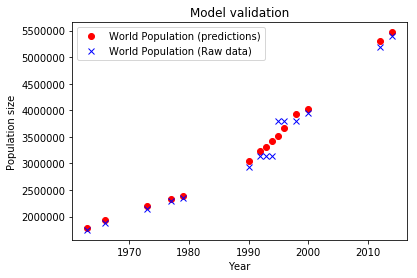

The average error for the validation step is 3.43%.
The coefficient of determination (r^2) value from the training step 0.984.


In [10]:
from sklearn.ensemble import GradientBoostingRegressor

# importing relevant packages, libraries and classes associated with python
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

with open('population_ensemble_learning.csv') as f:
   print(f)
dataset = pd.read_csv('population_ensemble_learning.csv', encoding='cp1252')

dummy_index = 0
country_name = 'Singapore'
for i in range (len(dataset)):
    if dataset['Country Name'][i] == country_name:
        dummy_index = i

start_year = 1960
end_year = 2017
diff_year = end_year - start_year
year_list = []
for i in range(diff_year+1):
    year = start_year + i
    year_list.append(year)

data_x = year_list

data_y = []
for item in data_x:
    data_y.append(dataset[str(item)][dummy_index])

x_train,x_test,y_train,y_test =  train_test_split(data_x,data_y)

x_train = (np.array(x_train))
x_train = x_train.reshape(len(x_train),-1)

y_train = (np.array(y_train))
y_train = y_train.reshape(len(y_train),-1)

x_test = (np.array(x_test))
x_test = x_test.reshape(len(x_test),-1)

y_test = (np.array(y_test))
y_test = y_test.reshape(len(y_test),-1)

gradient_boost_model = GradientBoostingRegressor(max_depth = 3, n_estimators=200)
gradient_boost_model.fit(x_train,y_train)
y_pred = gradient_boost_model.predict(x_test)
r2_value = r2_score(y_test,y_pred)
r2_value = round(r2_value,3)

graph1 = plt.plot(x_test,y_test,'o', label = 'World Population' + " " + '(predictions)',
                  color = 'r')
graph2 = plt.plot(x_test,y_pred,'x', label = 'World Population' + " "+ '(Raw data)',
                  color = 'b')
plt.xlabel('Year')
plt.ylabel('Population size')
plt.title('Model validation')
# plt.grid(color='r', linestyle='', linewidth=2)
legend = plt.legend()
leg_lines = legend.get_lines()
leg_texts = legend.get_texts()
plt.setp(leg_lines, linewidth=2.0)
plt.show()

total_error = 0
avg_error = 0
for i in range(len(y_pred)):
    total_error += (abs(y_pred[i]-y_test[i])/min(y_pred[i],y_test[i]))
avg_error = (total_error/len(y_pred)) * 100
print('The average error for the validation step is ' + str(round(float(avg_error),2)) \
      + '%' + '.')
print('The coefficient of determination (r^2) value from the training step ' \
      + str(r2_value) + '.')